# Atomic Orbitals and One-Particle Densities

In [1]:
import veloxchem as vlx
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.integrate import simps

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 8.


In [2]:
np.set_printoptions(precision=2, suppress=True, linewidth=132) # printout format of NumPy arrays
au_to_nm = 0.0529177 # length conversion factor
au_to_ev = 27.2114 # energy conversion factor

### Molecule specification

In [3]:
mol_str = """
    Ne     0.000000    0.000000    0.000000
"""
molecule = vlx.Molecule.read_str(mol_str, units='angstrom')

### Basis set quality

In [4]:
# closed-shell HF wave functions
scf_drv = vlx.ScfRestrictedDriver()

In [5]:
# TODO: determine Hartree-Fock energies and put results into list
#       in the form of tuples [("basis", energy), ...]
results = []
for b in ['sto-3g',
          '6-31g','6-31+g','6-311g',
          'aug-cc-pvdz','cc-pvdz']:
    basis = vlx.MolecularBasis.read(molecule, b)
    scf_drv.compute(molecule, basis)
    results.append((b, scf_drv.get_scf_energy()))

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

               Occupation: 0.0 Energy:    0.35704 au                                                                      
               (   1 Ne  1p0 :     0.17) (   1 Ne  2p+1:    -0.20) (   1 Ne  2p0 :     0.36)                              
               (   1 Ne  3p+1:     0.58) (   1 Ne  3p0 :    -1.03)                                                        
                                                                                                                          
               Molecular Orbital No.  10:                                                                                 
               --------------------------                                                                                 
               Occupation: 0.0 Energy:    2.11125 au                                                                      
               (   1 Ne  1p+1:    -0.28) (   1 Ne  1p-1:     0.80) (   1 Ne  1p0 :    -0.42)                              
               (

               Occupation: 0.0 Energy:    8.09558 au                                                                      
               (   1 Ne  1p-1:     1.24) (   1 Ne  2p-1:    -1.35) (   1 Ne  3p-1:     0.51)                              
                                                                                                                          
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [6]:
# print the results
for res in results:
    print("Basis set: %14s   Energy: %14.8f" % res)

Basis set:         sto-3g   Energy:  -126.60452500
Basis set:          6-31g   Energy:  -128.47387687
Basis set:         6-31+g   Energy:  -128.48354973
Basis set:         6-311g   Energy:  -128.52255305
Basis set:    aug-cc-pvdz   Energy:  -128.49634973
Basis set:        cc-pvdz   Energy:  -128.48877555


### Orbital values

In [7]:
# visualization
vis_drv = vlx.VisualizationDriver()

In [8]:
# mo values at given coordinates
mol_orbs = scf_drv.mol_orbs

# define the coordinates (in Bohr) for which you wish values of orbitals and densities
n = 200
coords = np.zeros((n,3))
r = np.linspace(0,3,n)
coords[:,2] = r # radial points along the z-axis

# get the values of orbitals
mo_1s = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 0, 'alpha'))
mo_2s = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 1, 'alpha'))
mo_2p_1 = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 2, 'alpha'))
mo_2p_2 = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 3, 'alpha'))
mo_2p_3 = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 4, 'alpha'))

Text(0, 0.5, 'Orbital value (a.u.)')

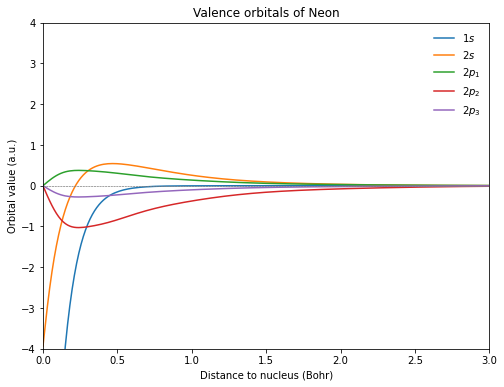

In [9]:
fig = plt.figure(1, figsize=(8,6))

plt.plot(r, mo_1s, r, mo_2s, r, mo_2p_1, r, mo_2p_2, r, mo_2p_3)

plt.axhline(y=0.0, color='0.5', linewidth = 0.7, dashes = [3,1,3,1])
plt.setp(plt.gca(), xlim = (0,3), ylim = (-4, 4))
plt.legend([r'$1s$', r'$2s$', r'$2p_1$', r'$2p_2$', r'$2p_3$'], loc = 'upper right', frameon = False)

plt.title(r'Valence orbitals of Neon')
plt.xlabel(r'Distance to nucleus (Bohr)')
plt.ylabel(r'Orbital value (a.u.)')

### Atomic sub-shell densities

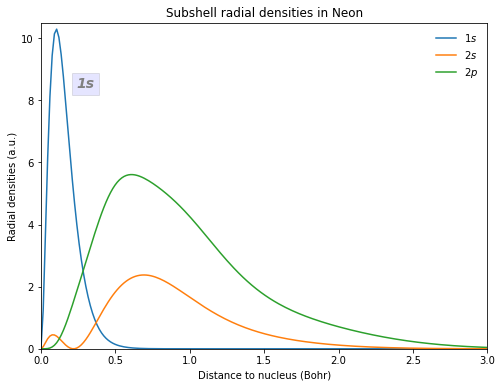

In [30]:
fig = plt.figure(2, figsize=(8,6))

# additional factor of 2 from alpha and beta spin orbitals
rad_den_1s = 4 * np.pi * r**2 * 2 * mo_1s**2 
rad_den_2s = 4 * np.pi * r**2 * 2 * mo_2s**2 
rad_den_2p = 4 * np.pi * r**2 * 2 * (mo_2p_1**2 + mo_2p_2**2 + mo_2p_3**2)

plt.plot(r, rad_den_1s, r, rad_den_2s, r, rad_den_2p)

ax = plt.gca()
plt.axhline(y=0.0, color='0.5', linewidth = 0.7, dashes = [3,1,3,1])
plt.setp(ax, xlim = (0,3), ylim = (0.0, 10.5))
plt.legend([r'$1s$', r'$2s$', r'$2p$'], loc = 'upper right', frameon = False)

plt.title(r'Subshell radial densities in Neon')
plt.xlabel(r'Distance to nucleus (Bohr)')
plt.ylabel(r'Radial densities (a.u.)')

plt.text(0.1, 0.8, '1s',
        ha = 'center',
        fontsize = 14,
        fontweight = 'bold',
        fontstyle = 'italic',
        color = '0.5',
        transform = ax.transAxes,
        bbox = dict(facecolor='blue', alpha=0.1)
        )

plt.show()

In [11]:
print('Number of electrons in 2s: %.6f' % simps(rad_den_2s, r))
print('Number of electrons in 2p: %.6f' % simps(rad_den_2p, r))

Number of electrons in 2s: 1.999729
Number of electrons in 2p: 5.989680


### One-electron density

In [12]:
# one-particle densities at given coordinates
density = scf_drv.density

den1 = np.array(vis_drv.get_density(coords, molecule, basis, density, 0, 'alpha'))

Text(0, 0.5, 'Radial density (a.u.)')

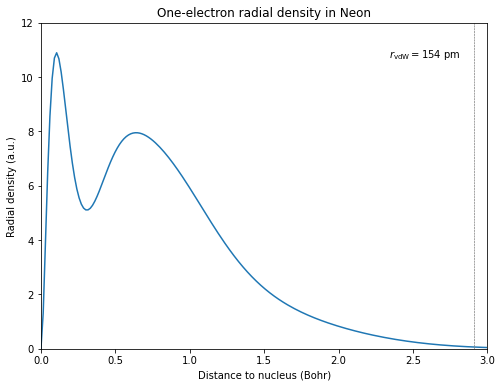

In [13]:
fig = plt.figure(3, figsize=(8,6))

# additional factor of 2 from alpha and beta spin orbitals
rad_den = 4*np.pi*r**2 * 2*den1 

plt.plot(r, rad_den)

plt.setp(plt.gca(), xlim = (0,3), ylim = (0.0, 12))

vdW = 0.154/au_to_nm
plt.axvline(x=vdW, color='0.5', linewidth = 0.7, dashes = [3,1,3,1])

plt.figtext(0.73, 0.8, r'$r_\mathrm{vdW} = 154$ pm', color='k')

plt.title(r'One-electron radial density in Neon')
plt.xlabel(r'Distance to nucleus (Bohr)')
plt.ylabel(r'Radial density (a.u.)')

In [15]:
print('Number of electrons: %.6f' % simps(rad_den, r))

Number of electrons: 9.990886


In [16]:
orb_energy = scf_drv.scf_tensors['E'][4] * au_to_ev
print("IP =%6.2f eV" % -orb_energy)

IP = 22.64 eV
